# Decision Tree (DT) Classifier - Breast Cancer Dataset 

The purpose of this notebook is to use and compare different classification algorithms and evaluate its accuracy (in this case DT) to classify either if the type of Breast Cancer is malignant or bening. The dataset was taken from SkLearn. 

In [212]:
from sklearn import datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree


In [213]:
cancer = datasets.load_breast_cancer()
print(f"Features: {cancer.feature_names}")
print()
print(f"Target: {cancer.target_names}")

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target: ['malignant' 'benign']


In [214]:
df = pd.DataFrame(data= cancer.data, columns=cancer.feature_names)
df.head(15)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [215]:
df.shape

(569, 30)

In [171]:
df["target"] = cancer.target
df.head(100)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,0.05649,...,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,0
96,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,...,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,1
97,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,...,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,1
98,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,1


# **Checking for missing values:**

In [172]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# **Data Split**

In [173]:
X = df.drop(columns=["target"])
y = df["target"]


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Training set: (455, 30)
Test set: (114, 30)


# **Building Decision Tree Model/Training:**

In [191]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

model.fit(X_train,y_train)




DecisionTreeClassifier()

# **Evaluation:**

**Accuracy**

In [192]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9385964912280702


In [193]:
model.score(X_train, y_train)

1.0

Getting a result of 1 indicates that the model is overfitting, which means that basically it is memorizing everything instead of learning. 

In [194]:
model.score(X_test, y_test)

0.9385964912280702

# **Confusion Matrix:**

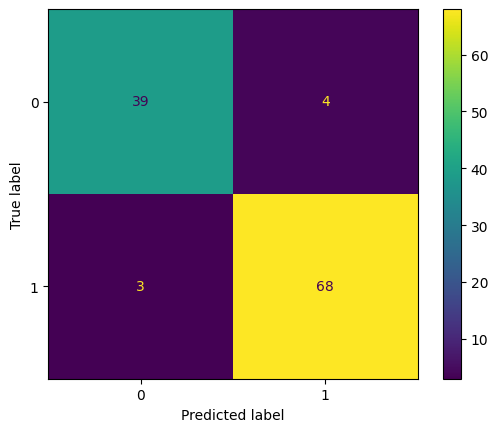

In [195]:
predictions = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# **Feature Importance/ Important Features:**

Feature Importance: We just get this from a D3 base Algorithm.

In [196]:
feature_importances = model.tree_.compute_feature_importances(normalize=False)
print("Feature Importance = " + str(feature_importances))



Feature Importance = [0.         0.         0.         0.         0.0029304  0.
 0.         0.3228506  0.         0.         0.         0.
 0.         0.00559513 0.0005775  0.         0.         0.00743872
 0.         0.0086638  0.02442056 0.03168365 0.02404453 0.
 0.00431133 0.         0.00376766 0.0306549  0.         0.        ]


In [197]:
print(feature_importances)

[0.         0.         0.         0.         0.0029304  0.
 0.         0.3228506  0.         0.         0.         0.
 0.         0.00559513 0.0005775  0.         0.         0.00743872
 0.         0.0086638  0.02442056 0.03168365 0.02404453 0.
 0.00431133 0.         0.00376766 0.0306549  0.         0.        ]


**First way:** 

In [198]:
columns_df = df.columns

In [199]:
cols_index = df.columns.get_indexer(columns_df)
print(cols_index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


In [200]:
indices = np.argsort(feature_importances)[::-1]

for f in range(X_train.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

1. Feature 7 (0.322851)
2. Feature 21 (0.031684)
3. Feature 27 (0.030655)
4. Feature 20 (0.024421)
5. Feature 22 (0.024045)
6. Feature 19 (0.008664)
7. Feature 17 (0.007439)
8. Feature 13 (0.005595)
9. Feature 24 (0.004311)
10. Feature 26 (0.003768)
11. Feature 4 (0.002930)
12. Feature 14 (0.000578)
13. Feature 3 (0.000000)
14. Feature 9 (0.000000)
15. Feature 5 (0.000000)
16. Feature 6 (0.000000)
17. Feature 2 (0.000000)
18. Feature 1 (0.000000)
19. Feature 8 (0.000000)
20. Feature 29 (0.000000)
21. Feature 10 (0.000000)
22. Feature 11 (0.000000)
23. Feature 12 (0.000000)
24. Feature 28 (0.000000)
25. Feature 15 (0.000000)
26. Feature 16 (0.000000)
27. Feature 18 (0.000000)
28. Feature 23 (0.000000)
29. Feature 25 (0.000000)
30. Feature 0 (0.000000)


**Second way:**

In [201]:
f_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X_train.columns)),
                    columns=["Value", "Feature"])
f_imp

,Value,Feature
0,0.000000,compactness error
1,0.000000,concavity error
2,0.000000,mean area
3,0.000000,mean compactness
4,0.000000,mean concavity
5,0.000000,mean fractal dimension
6,0.000000,mean perimeter
7,0.000000,mean radius
8,0.000000,mean symmetry
9,0.000000,mean texture


# Most important feature: mean concave points   

- The features that are not important, we can remove them from the NN so we make it faster: less noise. 
- If we need to make a report: When doing a report, we can also mention what is important and what is not important. 

- For the visualization, we set the features names and the classes name instead of just seeing the feature number. Also, we add color. 

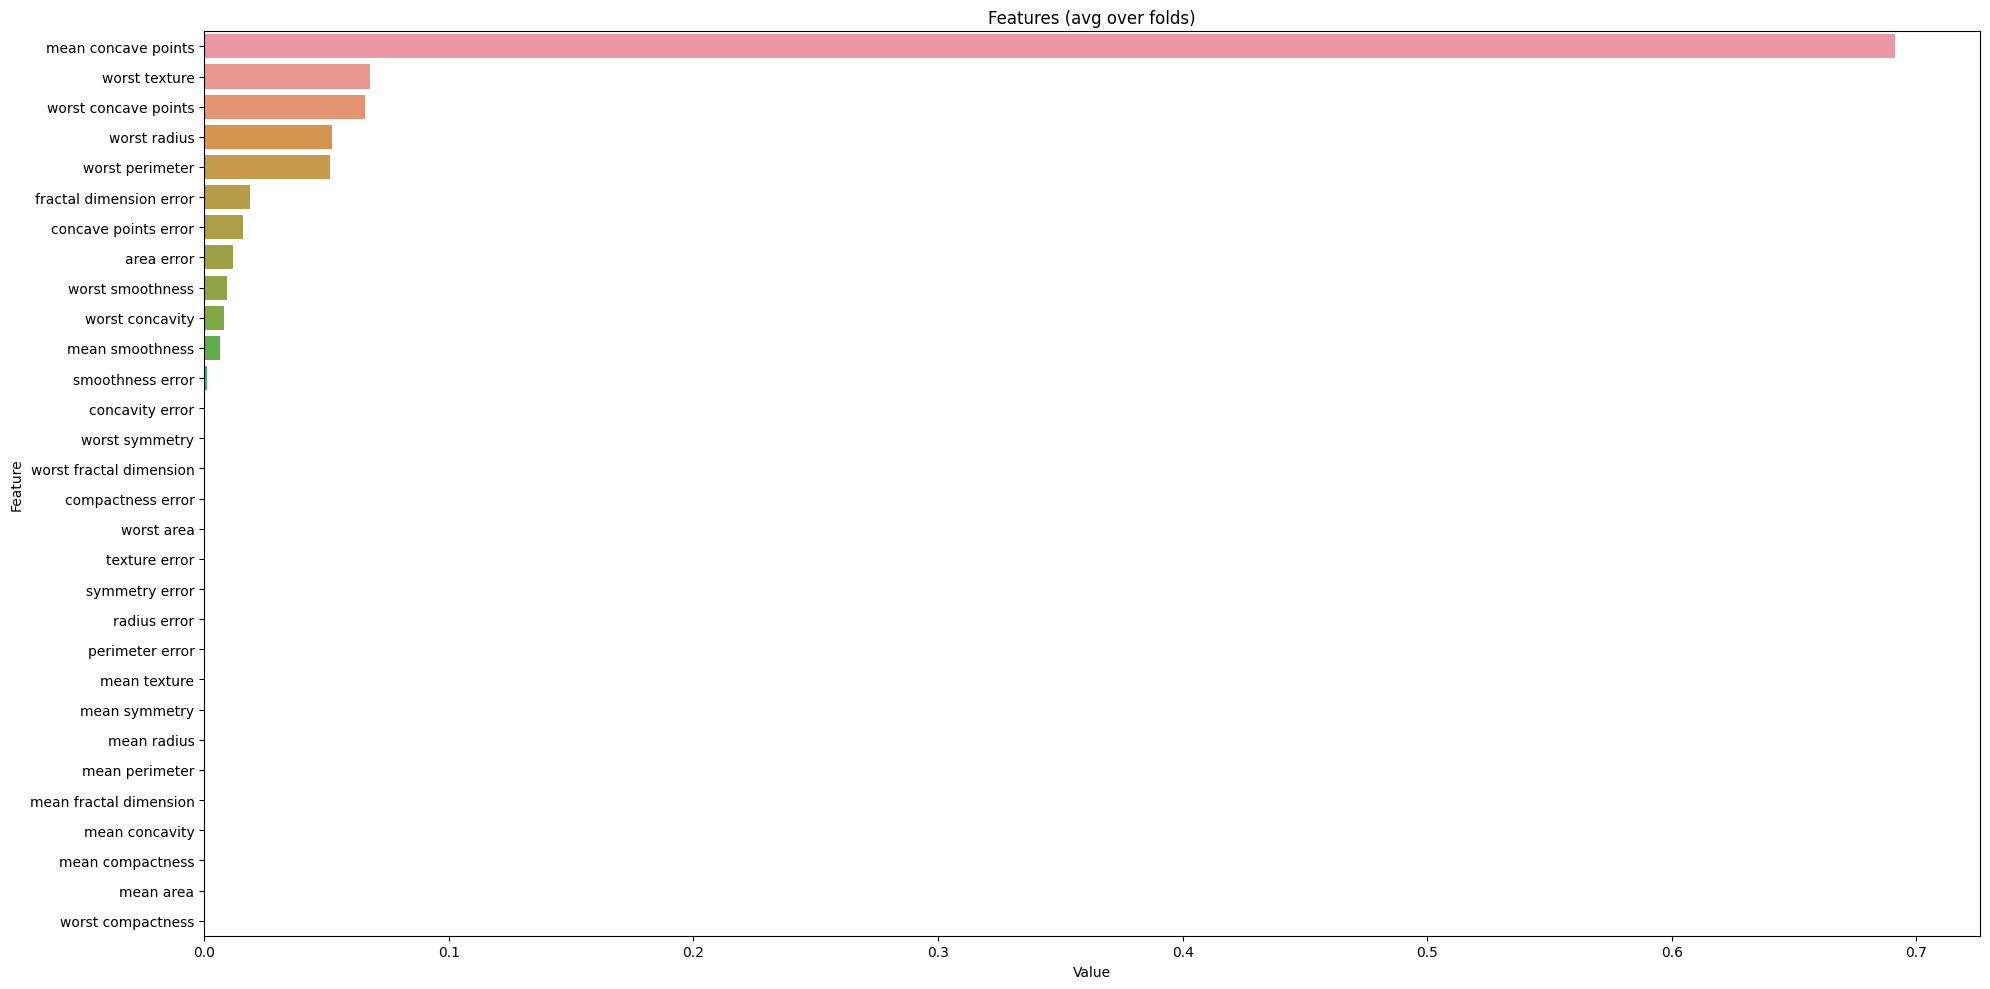

In [202]:
plt.figure(figsize=(20,10))
sns.barplot(x="Value", y="Feature", data=f_imp.sort_values(by="Value", ascending=False))
plt.title("Features (avg over folds)")
plt.tight_layout()
plt.show()


# **Visualization:**

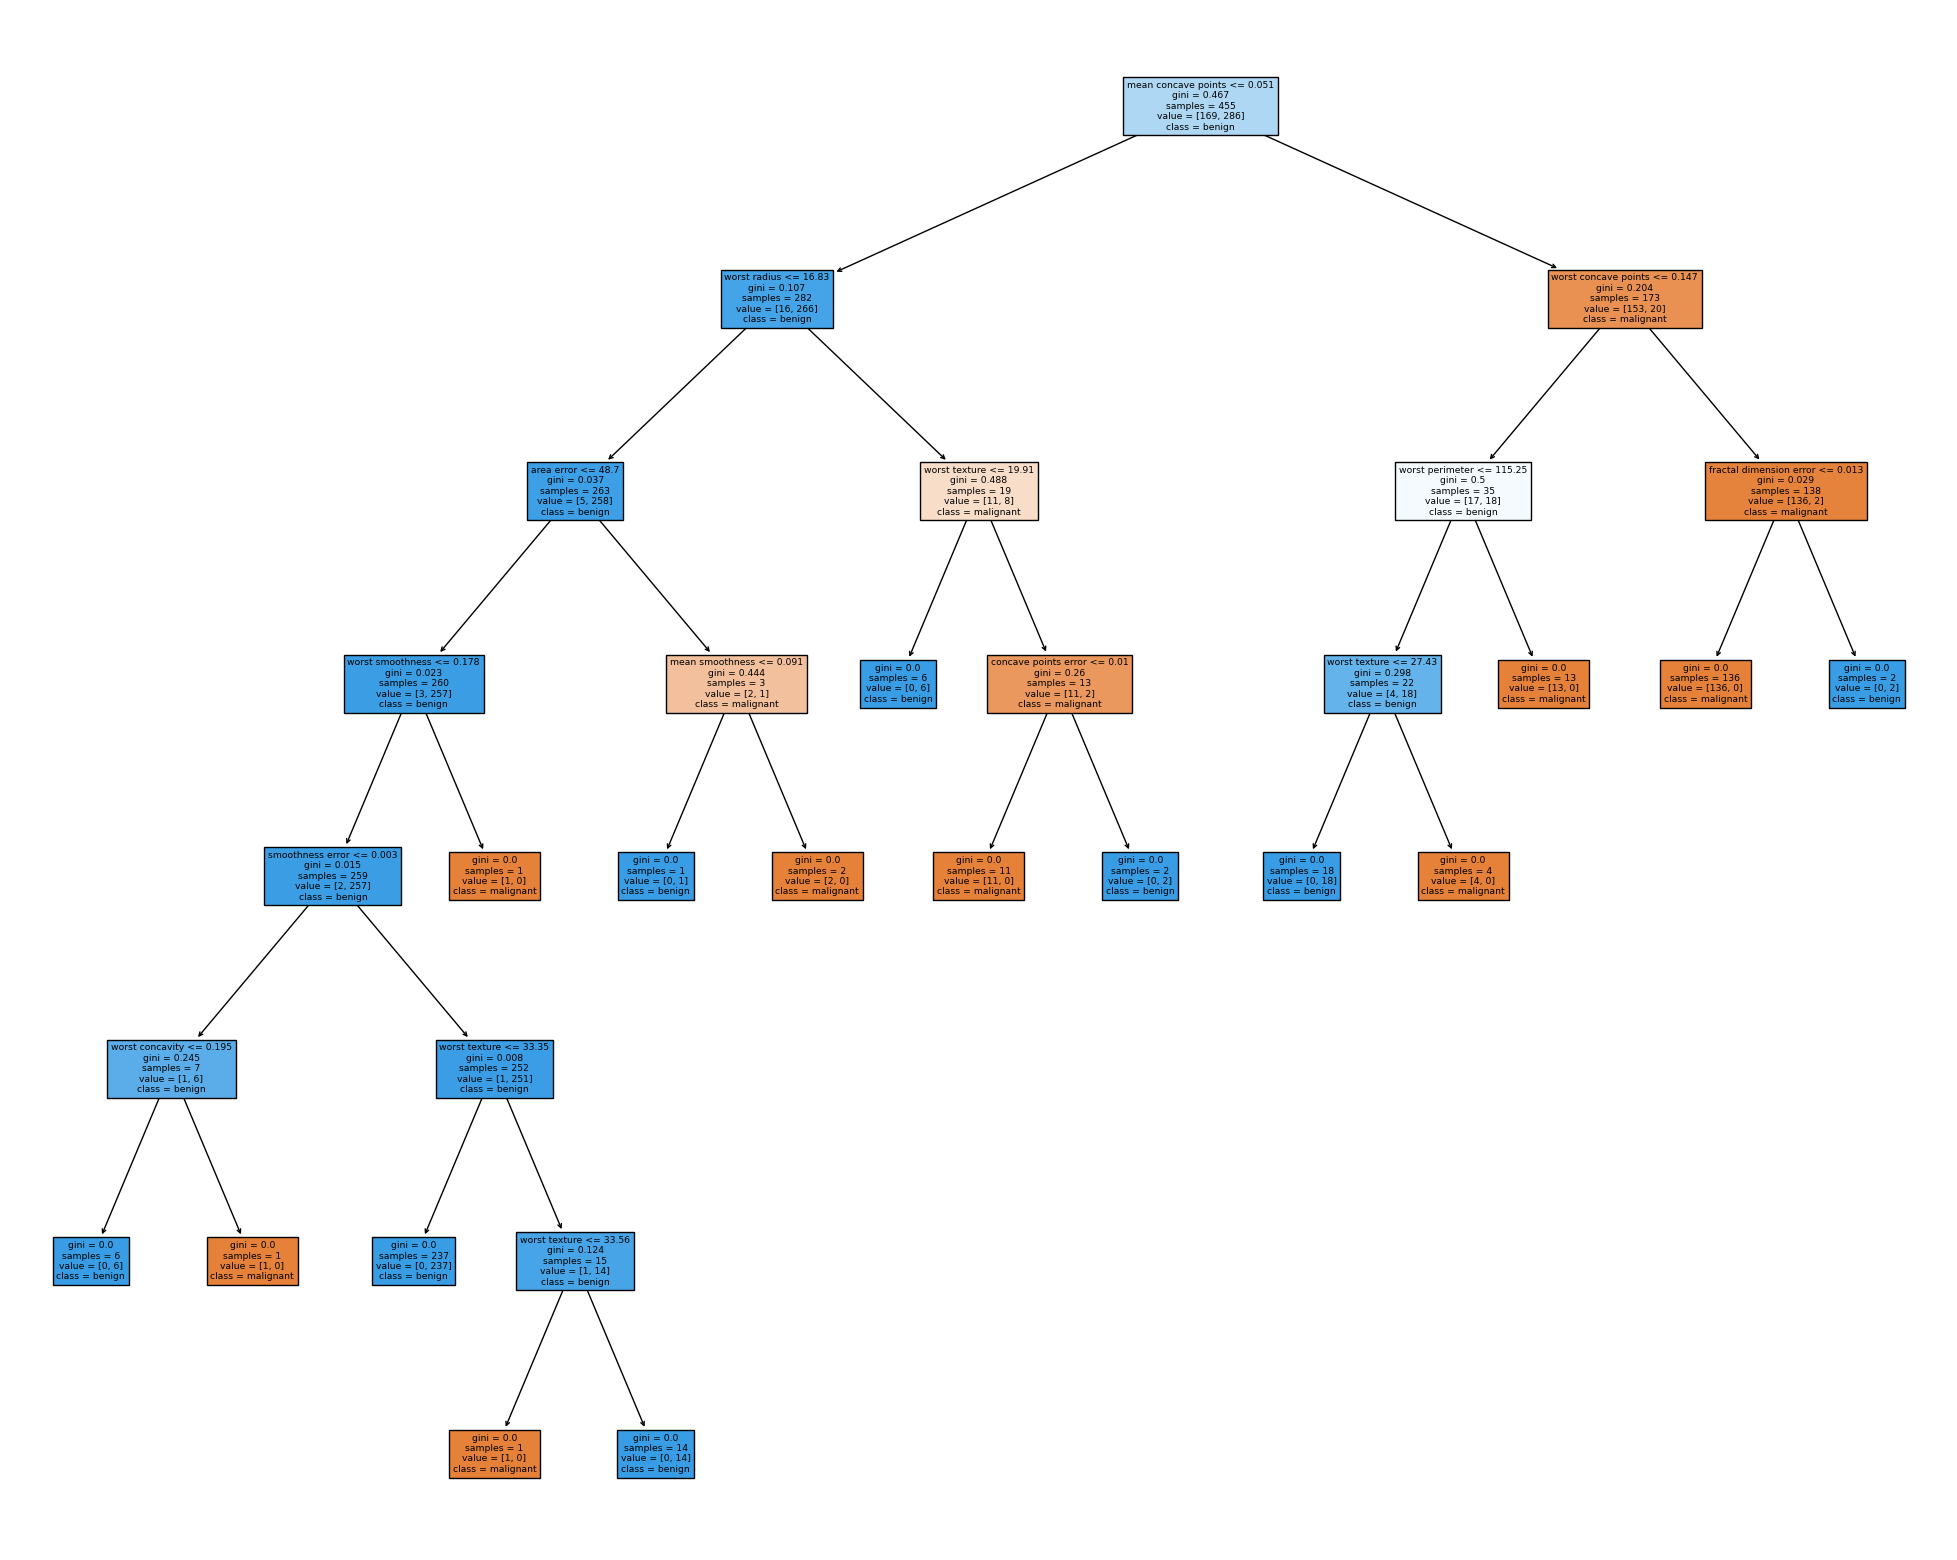

In [217]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                  feature_names = cancer.feature_names.tolist(),
                  class_names = cancer.target_names.tolist(),
                  filled = True)

#change features_names and target_names tolist() because it was not compatible with the arrays.


# **Optimizing the Decision Tree:**

In [216]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


max_depth = 3 = 96%
4 = 95%
5 = 94%
6 = 93% 
7 = 94%
8 = 94%
9 = 94%
10 = 95%

